# Analysis

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
class LoanApprovalConfig:
    train_path = '../data/train.csv'
    test_path = '../data/test.csv'
    
config = LoanApprovalConfig


In [3]:
trainSet = pd.read_csv(config.train_path)
testSet = pd.read_csv(config.test_path)

In [4]:
trainSet.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [5]:
trainSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [6]:
object_columns = ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']

# Preprocessing

We need to convert text data into numerical data. Since most of the fields are categorical in nature OneHotEncoder is best suited for the needs.

In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
cat_pipeline = make_pipeline(OneHotEncoder())

In [8]:
from sklearn.compose import make_column_transformer, make_column_selector
preProcessingTransformer = make_column_transformer((cat_pipeline, make_column_selector(dtype_include=object)),
                                                  remainder='passthrough')
preprocessedArray = preProcessingTransformer.fit_transform(trainSet)
preProcessingTransformer.get_feature_names_out()
train = pd.DataFrame(preprocessedArray, columns=preProcessingTransformer.get_feature_names_out())

In [9]:
train.sample(20)

,pipeline__person_home_ownership_MORTGAGE,pipeline__person_home_ownership_OTHER,pipeline__person_home_ownership_OWN,pipeline__person_home_ownership_RENT,pipeline__loan_intent_DEBTCONSOLIDATION,pipeline__loan_intent_EDUCATION,pipeline__loan_intent_HOMEIMPROVEMENT,pipeline__loan_intent_MEDICAL,pipeline__loan_intent_PERSONAL,pipeline__loan_intent_VENTURE,...,pipeline__cb_person_default_on_file_Y,remainder__id,remainder__person_age,remainder__person_income,remainder__person_emp_length,remainder__loan_amnt,remainder__loan_int_rate,remainder__loan_percent_income,remainder__cb_person_cred_hist_length,remainder__loan_status
5940,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,5940.0,29.0,43200.0,1.0,3000.0,11.97,0.07,7.0,0.0
42871,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,42871.0,23.0,90000.0,1.0,13000.0,13.57,0.14,2.0,0.0
49313,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,49313.0,31.0,50000.0,4.0,3000.0,6.03,0.06,7.0,0.0
22934,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,22934.0,25.0,120000.0,5.0,5000.0,7.88,0.04,2.0,0.0
55984,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,55984.0,24.0,47000.0,5.0,7000.0,7.14,0.15,3.0,0.0
2454,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,2454.0,32.0,40000.0,16.0,18000.0,9.91,0.44,6.0,0.0
46683,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,46683.0,22.0,30000.0,7.0,8000.0,12.98,0.27,2.0,0.0
45433,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,45433.0,23.0,47000.0,0.0,4900.0,14.65,0.11,3.0,0.0
9379,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,9379.0,24.0,30000.0,0.0,8500.0,19.29,0.29,4.0,1.0
597,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,597.0,60.0,45000.0,1.0,8000.0,12.99,0.18,21.0,0.0


In [10]:
train.describe()

,pipeline__person_home_ownership_MORTGAGE,pipeline__person_home_ownership_OTHER,pipeline__person_home_ownership_OWN,pipeline__person_home_ownership_RENT,pipeline__loan_intent_DEBTCONSOLIDATION,pipeline__loan_intent_EDUCATION,pipeline__loan_intent_HOMEIMPROVEMENT,pipeline__loan_intent_MEDICAL,pipeline__loan_intent_PERSONAL,pipeline__loan_intent_VENTURE,...,pipeline__cb_person_default_on_file_Y,remainder__id,remainder__person_age,remainder__person_income,remainder__person_emp_length,remainder__loan_amnt,remainder__loan_int_rate,remainder__loan_percent_income,remainder__cb_person_cred_hist_length,remainder__loan_status
count,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,...,58645.000000,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,0.423293,0.001518,0.053508,0.521681,0.155734,0.209242,0.107085,0.186444,0.170790,0.170705,...,0.148384,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,0.494085,0.038927,0.225047,0.499534,0.362606,0.406771,0.309224,0.389468,0.376329,0.376254,...,0.355484,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   pipeline__person_home_ownership_MORTGAGE  58645 non-null  float64
 1   pipeline__person_home_ownership_OTHER     58645 non-null  float64
 2   pipeline__person_home_ownership_OWN       58645 non-null  float64
 3   pipeline__person_home_ownership_RENT      58645 non-null  float64
 4   pipeline__loan_intent_DEBTCONSOLIDATION   58645 non-null  float64
 5   pipeline__loan_intent_EDUCATION           58645 non-null  float64
 6   pipeline__loan_intent_HOMEIMPROVEMENT     58645 non-null  float64
 7   pipeline__loan_intent_MEDICAL             58645 non-null  float64
 8   pipeline__loan_intent_PERSONAL            58645 non-null  float64
 9   pipeline__loan_intent_VENTURE             58645 non-null  float64
 10  pipeline__loan_grade_A            

array([[<Axes: title={'center': 'pipeline__person_home_ownership_MORTGAGE'}>,
        <Axes: title={'center': 'pipeline__person_home_ownership_OTHER'}>,
        <Axes: title={'center': 'pipeline__person_home_ownership_OWN'}>,
        <Axes: title={'center': 'pipeline__person_home_ownership_RENT'}>,
        <Axes: title={'center': 'pipeline__loan_intent_DEBTCONSOLIDATION'}>],
       [<Axes: title={'center': 'pipeline__loan_intent_EDUCATION'}>,
        <Axes: title={'center': 'pipeline__loan_intent_HOMEIMPROVEMENT'}>,
        <Axes: title={'center': 'pipeline__loan_intent_MEDICAL'}>,
        <Axes: title={'center': 'pipeline__loan_intent_PERSONAL'}>,
        <Axes: title={'center': 'pipeline__loan_intent_VENTURE'}>],
       [<Axes: title={'center': 'pipeline__loan_grade_A'}>,
        <Axes: title={'center': 'pipeline__loan_grade_B'}>,
        <Axes: title={'center': 'pipeline__loan_grade_C'}>,
        <Axes: title={'center': 'pipeline__loan_grade_D'}>,
        <Axes: title={'center': 'pi

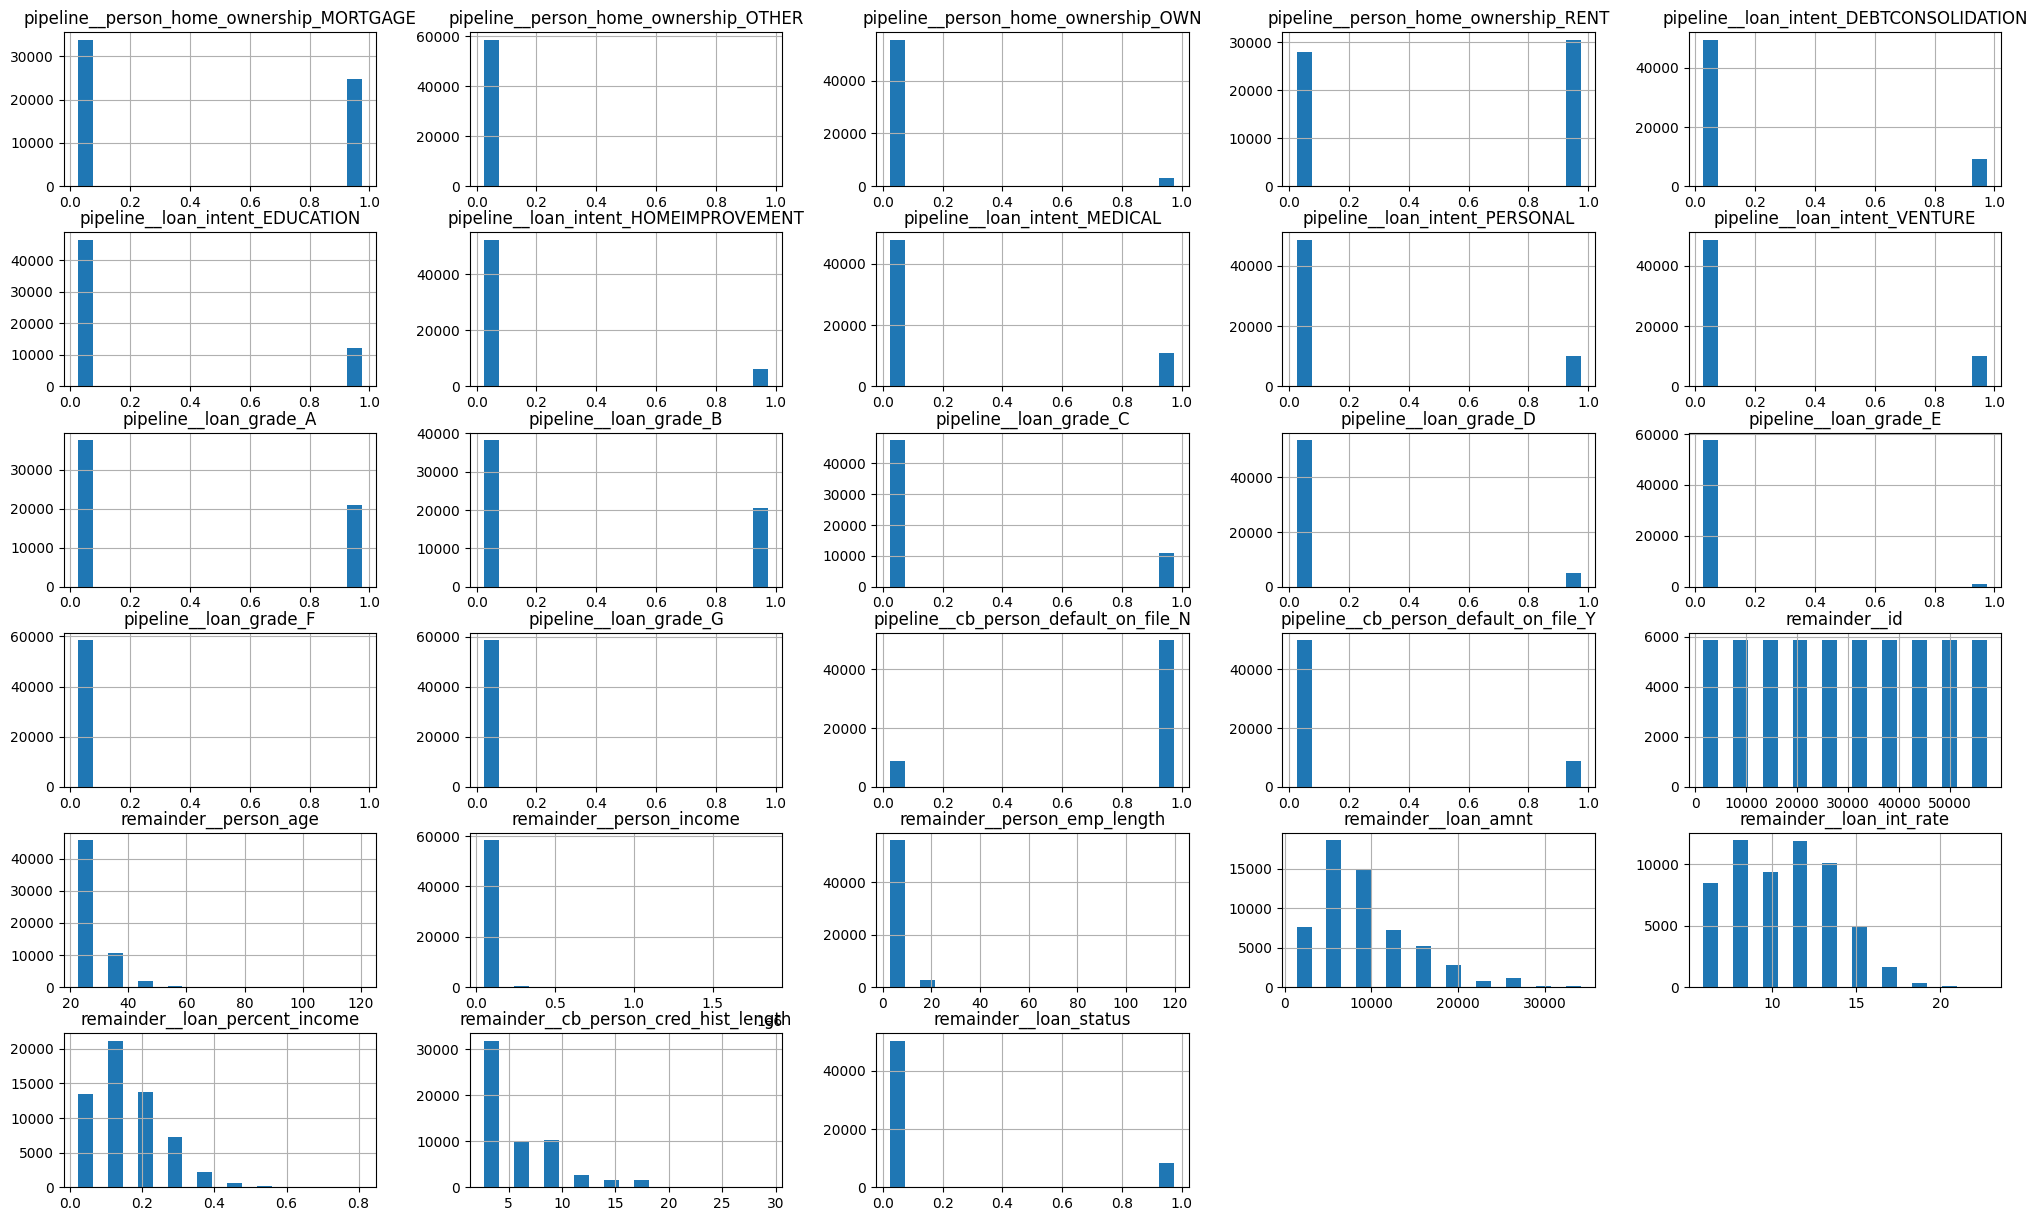

In [12]:
train.hist(bins=10,figsize=(25,15),rwidth=0.5)

<Axes: >

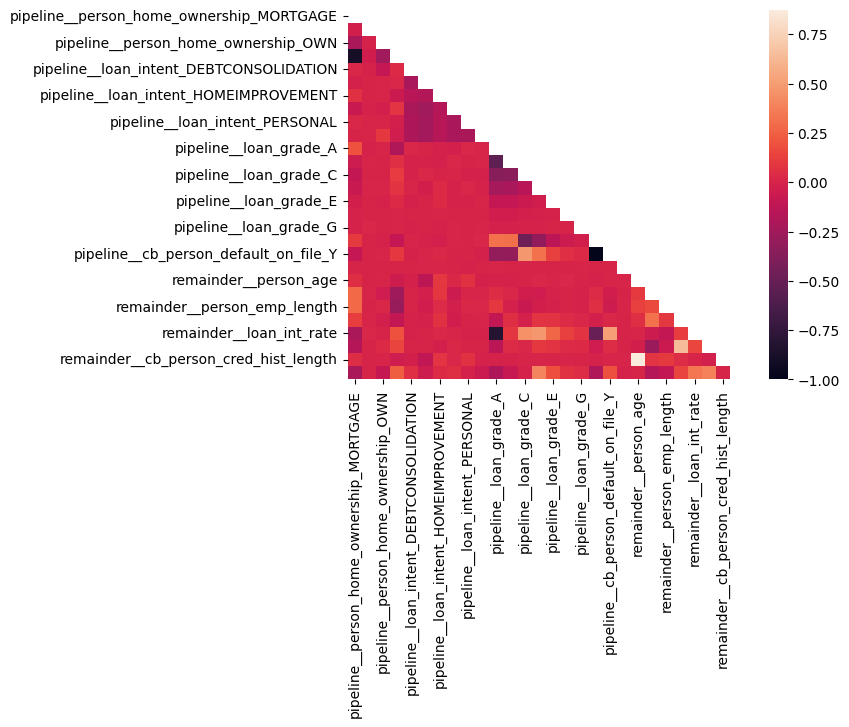

In [13]:
import seaborn as sns
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask=mask)

In [14]:
corr.iloc[-1].sort_values()

pipeline__person_home_ownership_MORTGAGE   -0.202613
pipeline__loan_grade_A                     -0.199089
pipeline__cb_person_default_on_file_N      -0.186962
remainder__person_income                   -0.169956
remainder__person_emp_length               -0.100428
pipeline__person_home_ownership_OWN        -0.087556
pipeline__loan_grade_B                     -0.083765
pipeline__loan_intent_VENTURE              -0.064378
pipeline__loan_intent_EDUCATION            -0.051005
pipeline__loan_intent_PERSONAL             -0.012461
pipeline__loan_grade_C                     -0.009654
remainder__id                              -0.008138
remainder__cb_person_cred_hist_length      -0.003030
remainder__person_age                      -0.001130
pipeline__person_home_ownership_OTHER       0.002918
pipeline__loan_intent_HOMEIMPROVEMENT       0.031063
pipeline__loan_grade_G                      0.045889
pipeline__loan_intent_MEDICAL               0.049139
pipeline__loan_intent_DEBTCONSOLIDATION     0.

In [15]:
corr[(corr['remainder__loan_status'] > 0.1) | (corr['remainder__loan_status'] < -0.1)]['remainder__loan_status'].sort_values()


pipeline__person_home_ownership_MORTGAGE   -0.202613
pipeline__loan_grade_A                     -0.199089
pipeline__cb_person_default_on_file_N      -0.186962
remainder__person_income                   -0.169956
remainder__person_emp_length               -0.100428
remainder__loan_amnt                        0.144982
pipeline__loan_grade_E                      0.182878
pipeline__cb_person_default_on_file_Y       0.186962
pipeline__person_home_ownership_RENT        0.239620
remainder__loan_int_rate                    0.338948
remainder__loan_percent_income              0.378280
pipeline__loan_grade_D                      0.395646
remainder__loan_status                      1.000000
Name: remainder__loan_status, dtype: float64

# Training and Test Data

In [16]:
trainSet.sample(10)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
21039,21039,22,65000,MORTGAGE,2.0,EDUCATION,A,6000,6.03,0.09,N,3,0
52485,52485,23,47000,MORTGAGE,7.0,PERSONAL,C,18000,14.26,0.38,N,3,0
15329,15329,26,80000,MORTGAGE,3.0,PERSONAL,C,10000,12.73,0.13,N,3,0
51636,51636,25,120000,OWN,1.0,MEDICAL,B,6000,11.89,0.05,N,2,0
7157,7157,26,60000,RENT,1.0,DEBTCONSOLIDATION,C,9000,12.73,0.15,N,2,0
3646,3646,32,24000,RENT,0.0,VENTURE,B,5000,11.49,0.21,N,9,0
30362,30362,31,45000,RENT,1.0,EDUCATION,C,8000,13.16,0.18,N,5,0
53015,53015,25,68004,RENT,9.0,DEBTCONSOLIDATION,B,15000,11.89,0.22,N,4,0
24896,24896,25,105000,MORTGAGE,3.0,EDUCATION,A,20000,6.91,0.19,N,3,0
7863,7863,34,56000,RENT,1.0,EDUCATION,D,11000,18.25,0.20,Y,9,1


In [17]:
columns_considered = ["pipeline__person_home_ownership_MORTGAGE","pipeline__loan_grade_A","pipeline__cb_person_default_on_file_N","remainder__person_income","remainder__person_emp_length","pipeline__person_home_ownership_OWN","pipeline__loan_grade_B","pipeline__loan_grade_C","pipeline__person_home_ownership_OTHER","pipeline__loan_intent_HOMEIMPROVEMENT","pipeline__loan_grade_G","pipeline__loan_intent_MEDICAL","pipeline__loan_intent_DEBTCONSOLIDATION","pipeline__loan_grade_F","remainder__loan_amnt","pipeline__loan_grade_E","pipeline__cb_person_default_on_file_Y","pipeline__person_home_ownership_RENT","remainder__loan_int_rate","remainder__loan_percent_income","pipeline__loan_grade_D"]
X = train[columns_considered]
y=train['remainder__loan_status']

# Model Building

In [18]:
from sklearn.model_selection import cross_val_predict, cross_val_score

## Random Forest Classification

In [19]:
from sklearn.ensemble import (RandomForestClassifier
    ,GradientBoostingClassifier
    ,HistGradientBoostingClassifier)

In [20]:
forest_clf = RandomForestClassifier(random_state=42)

In [21]:
y_probas = cross_val_predict(forest_clf, X, y, cv=3,method='predict_proba')

In [22]:
y_scores_forest = y_probas[:,1]

## Gradient Boosting Classification

In [23]:
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0)

In [24]:
y_scores_gb = cross_val_predict(gb_clf, X, y, cv=3, method='decision_function')

## Histogram Gradient Boosting Classifier

In [25]:
hgb_clf = HistGradientBoostingClassifier()

In [26]:
y_scores_hgb = cross_val_predict(hgb_clf, X, y, cv=3, method='decision_function')

## Decision Tree

In [27]:
from sklearn import tree

In [28]:
dt_clf = tree.DecisionTreeClassifier()

In [29]:
y_probas_dt = cross_val_predict(dt_clf, X,y, cv=3, method='predict_proba')

In [30]:
y_scores_dt = y_probas_dt[:,1]

## SGD Classification

In [58]:
from sklearn.linear_model import SGDClassifier

In [59]:
sgd_clf = SGDClassifier()

In [77]:
y_scores_sgd = cross_val_predict(sgd_clf, X, y, method='decision_function')

## Gaussian Naive Bayes

In [73]:
from sklearn.naive_bayes import GaussianNB

In [74]:
gnb_clf = GaussianNB()

In [79]:
y_probas_gnb = cross_val_predict(gnb_clf, X, y, method='predict_proba')

In [80]:
y_scores_gnb = y_probas_gnb[:,1]

## Measuring model performance

### Accuracy, Precision, Recall & F1

#### Forest Classifier

In [31]:
cross_val_score(forest_clf, X, y, cv=3, scoring='accuracy')

array([0.94695381, 0.9490485 , 0.95104359])

In [32]:
cross_val_score(forest_clf, X, y, cv=3, scoring='precision')

array([0.91261219, 0.91346599, 0.915     ])

In [33]:
cross_val_score(forest_clf, X, y, cv=3, scoring='recall')

array([0.69396552, 0.7093065 , 0.72332016])

In [34]:
cross_val_score(forest_clf, X, y, cv=3, scoring='f1')

array([0.78841053, 0.79854369, 0.80794702])

In [35]:
from sklearn.metrics import precision_recall_curve
precision_forest, recall_forest, thresholds_forest = precision_recall_curve(y, y_scores_forest)

#### Gradient Boosting Classifier

In [36]:
cross_val_score(gb_clf, X, y, cv=3, scoring='accuracy')

array([0.94521459, 0.94521179, 0.94930428])

In [37]:
cross_val_score(gb_clf, X, y, cv=3, scoring='precision')

array([0.86680942, 0.86489953, 0.87842972])

In [38]:
cross_val_score(gb_clf, X, y, cv=3, scoring='recall')

array([0.72701149, 0.72763205, 0.74775422])

In [39]:
cross_val_score(gb_clf, X, y, cv=3, scoring='f1')

array([0.79093396, 0.79086116, 0.80752813])

In [40]:
precision_gb, recall_gb, thresholds_gb = precision_recall_curve(y, y_scores_gb)

#### Histogram Gradient Boosting Classifier

In [41]:
cross_val_score(hgb_clf, X, y, cv=3, scoring='accuracy')

array([0.95063686, 0.95053202, 0.95447105])

In [42]:
cross_val_score(hgb_clf, X, y, cv=3, scoring='precision')

array([0.92901088, 0.92625646, 0.9383341 ])

In [43]:
cross_val_score(hgb_clf, X, y, cv=3, scoring='recall')

array([0.70150862, 0.71469637, 0.73553719])

In [44]:
cross_val_score(hgb_clf, X, y, cv=3, scoring='f1')

array([0.7989353 , 0.80251674, 0.8193159 ])

In [45]:
precision_hgb, recall_hgb, thresholds_hgb = precision_recall_curve(y, y_scores_hgb)

#### Decision Tree Classifier

In [46]:
cross_val_score(dt_clf, X, y, cv=3, scoring='accuracy')

array([0.91283442, 0.91344383, 0.91605279])

In [47]:
cross_val_score(dt_clf, X, y, cv=3, scoring='precision')

array([0.6797676 , 0.69810659, 0.69246367])

In [48]:
cross_val_score(dt_clf, X, y, cv=3, scoring='recall')

array([0.71695402, 0.71146245, 0.73733381])

In [49]:
cross_val_score(dt_clf, X, y, cv=3, scoring='f1')

array([0.69815628, 0.70024657, 0.7128402 ])

In [71]:
precision_dt, recall_dt, thresholds_dt = precision_recall_curve(y, y_scores_dt)

#### SGD Classifier

In [62]:
cross_val_score(sgd_clf, X, y, cv=3, scoring='accuracy')

array([0.88439306, 0.87282586, 0.88878658])

In [63]:
cross_val_score(sgd_clf, X, y, cv=3, scoring='precision')

array([0.14339467, 0.6       , 0.69565217])

In [64]:
cross_val_score(sgd_clf, X, y, cv=3, scoring='recall')

array([0.15732759, 0.00107797, 0.38016529])

In [65]:
cross_val_score(sgd_clf, X, y, cv=3, scoring='f1')

array([0.03914715, 0.24967455, 0.40901422])

In [70]:
precision_sgd, recall_sgd, thresholds_sgd = precision_recall_curve(y, y_scores_sgd)

#### Guassian Naive Bayes Classifier

In [81]:
cross_val_score(gnb_clf, X, y, cv=3, scoring='accuracy')

array([0.88485345, 0.88361981, 0.88668918])

In [82]:
cross_val_score(gnb_clf, X, y, cv=3, scoring='precision')

array([0.70390207, 0.70094937, 0.70373027])

In [83]:
cross_val_score(gnb_clf, X, y, cv=3, scoring='recall')

array([0.33045977, 0.31836148, 0.35249731])

In [84]:
cross_val_score(gnb_clf, X, y, cv=3, scoring='f1')

array([0.44976778, 0.4378552 , 0.46971511])

In [85]:
precision_gnb, recall_gnb, thresholds_gnb = precision_recall_curve(y, y_scores_gnb)

### Precision Recall Curve

In [51]:
import matplotlib.pyplot as plt

In [52]:
threshold = 0.91
threshold_plot = np.empty(recall_forest.shape[0])
threshold_plot.fill(threshold)

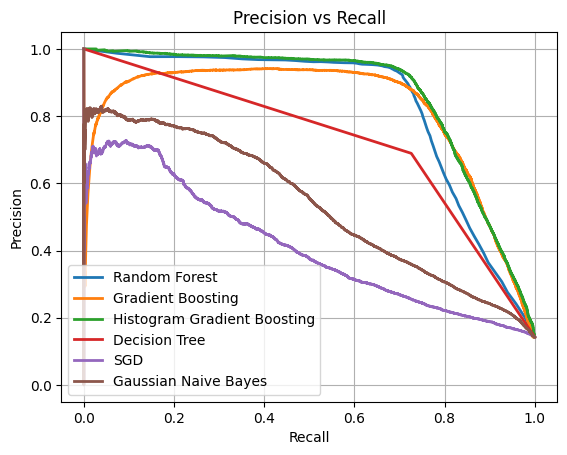

In [86]:
plt.plot(recall_forest, precision_forest, linewidth=2, label='Random Forest')
plt.plot(recall_gb, precision_gb, linewidth=2, label='Gradient Boosting')
plt.plot(recall_hgb, precision_hgb, linewidth=2, label='Histogram Gradient Boosting')
plt.plot(recall_dt, precision_dt, linewidth=2, label='Decision Tree')
plt.plot(recall_sgd, precision_sgd, linewidth=2, label='SGD')
plt.plot(recall_gnb, precision_gnb, linewidth=2, label='Gaussian Naive Bayes')
plt.grid()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs Recall')
plt.legend()
plt.show()

### Precision, Recall vs Threshold curve

#### Random Forest

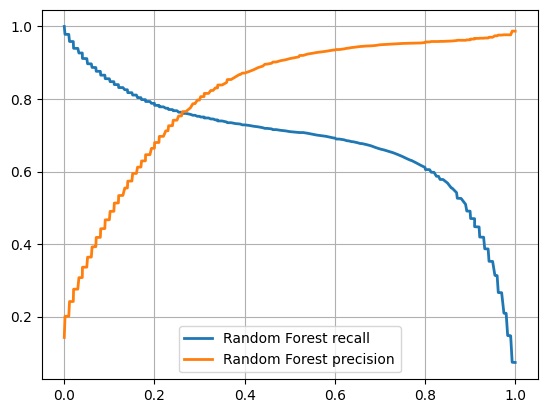

In [54]:
plt.plot(thresholds_forest, recall_forest[:-1], '-', linewidth=2, label='Random Forest recall')
plt.plot(thresholds_forest, precision_forest[:-1], '-', linewidth=2,  label='Random Forest precision')
plt.grid()
plt.legend()
plt.show()


#### Gradient Boost Classifier

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_36292\4222787279.py:1: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(thresholds_gb), recall_gb[:-1], '-', linewidth=2, label='Gradient Boosting recall')
C:\Users\Abhishek\AppData\Local\Temp\ipykernel_36292\4222787279.py:2: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(thresholds_gb), precision_gb[:-1], '-', linewidth=2,  label='Gradient Boosting precision')


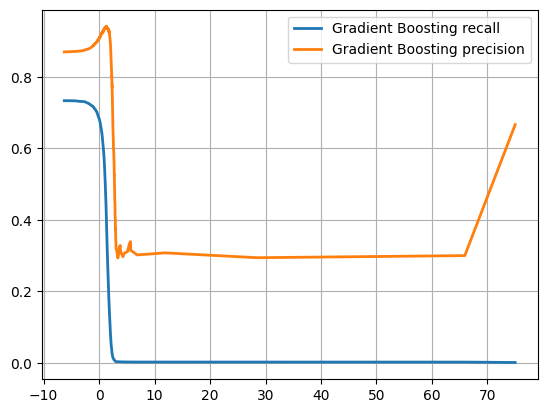

In [94]:
plt.plot(np.log(thresholds_gb), recall_gb[:-1], '-', linewidth=2, label='Gradient Boosting recall')
plt.plot(np.log(thresholds_gb), precision_gb[:-1], '-', linewidth=2,  label='Gradient Boosting precision')
plt.grid()
plt.legend()
plt.show()


#### Historgram Gradient Boost Classifier

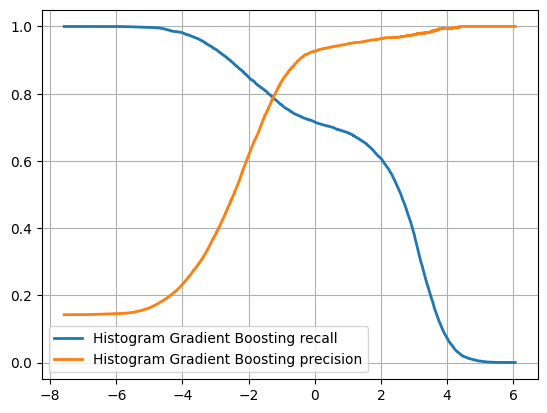

In [99]:
plt.plot(thresholds_hgb, recall_hgb[:-1], '-', linewidth=2, label='Histogram Gradient Boosting recall')
plt.plot(thresholds_hgb, precision_hgb[:-1], '-', linewidth=2,  label='Histogram Gradient Boosting precision')
plt.grid()
plt.legend()
plt.show()


#### Decision Tree Classifier

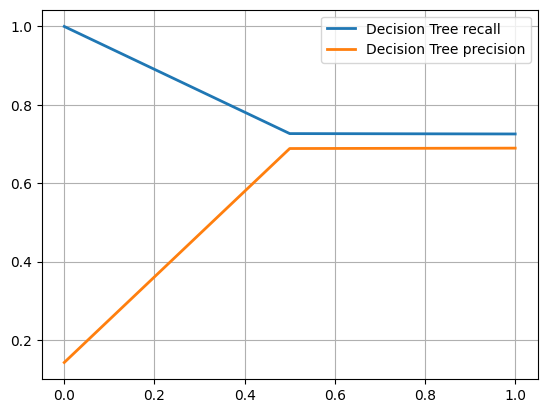

In [98]:
plt.plot(thresholds_dt, recall_dt[:-1], '-', linewidth=2, label='Decision Tree recall')
plt.plot(thresholds_dt, precision_dt[:-1], '-', linewidth=2,  label='Decision Tree precision')
plt.grid()
plt.legend()
plt.show()


#### SGD Classifier

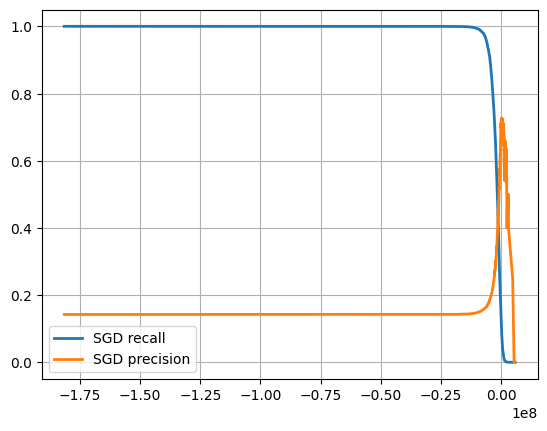

In [97]:
plt.plot(thresholds_sgd, recall_sgd[:-1], '-', linewidth=2, label='SGD recall')
plt.plot(thresholds_sgd, precision_sgd[:-1], '-', linewidth=2,  label='SGD precision')
plt.grid()
plt.legend()
plt.show()


#### Gaussian Naive Bayes Classifier

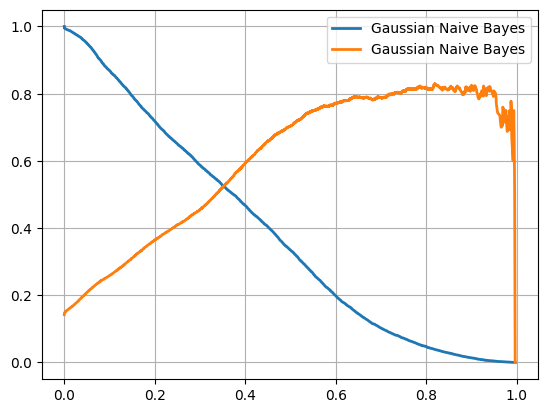

In [100]:
plt.plot(thresholds_gnb, recall_gnb[:-1], '-', linewidth=2, label='Gaussian Naive Bayes')
plt.plot(thresholds_gnb, precision_gnb[:-1], '-', linewidth=2,  label='Gaussian Naive Bayes')
plt.grid()
plt.legend()
plt.show()
